## Predicting Credit Card Approvals

### Data import

In [1]:
# Import pandas
import pandas as pd

# Load dataset
cc_data = pd.read_csv('crx.data', names=["Gender", "Age", "Debt", "Married", "BankCustomer", "EducationLevel", "Ethnicity", "YearsEmployed", "PriorDefault", "Employed", "CreditScore", "DriversLicense", "Citizen", "ZipCode", "Income", "Approved"])

# Look at the data
cc_data.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


### Viewing the data and info

In [2]:
# Data statistics
cc_data_description = cc_data.describe()
cc_data_description

,Debt,YearsEmployed,CreditScore,Income
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [3]:
# Data information
cc_info = cc_data.info()
cc_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
Gender            690 non-null object
Age               690 non-null object
Debt              690 non-null float64
Married           690 non-null object
BankCustomer      690 non-null object
EducationLevel    690 non-null object
Ethnicity         690 non-null object
YearsEmployed     690 non-null float64
PriorDefault      690 non-null object
Employed          690 non-null object
CreditScore       690 non-null int64
DriversLicense    690 non-null object
Citizen           690 non-null object
ZipCode           690 non-null object
Income            690 non-null int64
Approved          690 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.3+ KB


### Handling missing data values

In [4]:
# Checking to see for missing data values
# Null value check
cc_data.isna().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

There are no Null values, lets check if any surprises in the data

In [5]:
cc_data.tail(50)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
640,b,34.17,2.750,u,g,i,bb,2.500,f,f,0,t,g,00232,200,-
641,?,33.17,2.250,y,p,cc,v,3.500,f,f,0,t,g,00200,141,-
642,b,31.58,0.750,y,p,aa,v,3.500,f,f,0,t,g,00320,0,-
643,a,52.50,7.000,u,g,aa,h,3.000,f,f,0,f,g,00000,0,-
644,b,36.17,0.420,y,p,w,v,0.290,f,f,0,t,g,00309,2,-
645,b,37.33,2.665,u,g,cc,v,0.165,f,f,0,t,g,00000,501,-
646,a,20.83,8.500,u,g,c,v,0.165,f,f,0,f,g,00000,351,-
647,b,24.08,9.000,u,g,aa,v,0.250,f,f,0,t,g,00000,0,-
648,b,25.58,0.335,u,g,k,h,3.500,f,f,0,t,g,00340,0,-
649,a,35.17,3.750,u,g,ff,ff,0.000,f,t,6,f,g,00000,200,-


Upon inspecting the data, I see some '?' values in Gender field. So, lets get those values replaced with NaN.

In [6]:
# Import numpy
import numpy as np

# Replace '?'s with NaN
cc_data = cc_data.replace('?', np.nan)

# Check the missing values again
cc_data.tail(20)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
670,b,47.17,5.835,u,g,w,v,5.500,f,f,0,f,g,00465,150,-
671,b,25.83,12.835,u,g,cc,v,0.500,f,f,0,f,g,00000,2,-
672,a,50.25,0.835,u,g,aa,v,0.500,f,f,0,t,g,00240,117,-
673,NaN,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-


Okay, since we replaced the junk values with nulls - lets check the Null count now.

In [7]:
# Impute the missing values with mean imputation
cc_data.fillna(cc_data.mean(), inplace=True)

In [8]:
# Count the number of Nulls in the dataset again
cc_data.isnull().values.sum()

67

Please note that replacing mean values only works for numeric data fields

So, let's replace the missing values with most frequent values for non-numeric data fields

In [9]:

for col in cc_data.columns:
    # Check if the column is of object type
    if cc_data[col].dtypes == 'object':
        # Replace with the most frequent value
        cc_data = cc_data.fillna(cc_data[col].value_counts().index[0])

# Count the number of Nulls now
cc_data.isnull().values.sum()

0

Now we have successfully handled the missing values.

### Pre-processing of the data

Most of the machine learning models can't handle non-numeric values. So, lets convert the non-numeric fields to numeric. 

In [10]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le = LabelEncoder()

# Iterate over each column and do the conversion
for col in cc_data.columns:
    # Compare if the dtype is object
    if cc_data[col].dtype=='object':
    # Use LabelEncoder to convert to numeric
        cc_data[col]=le.fit_transform(cc_data[col])

I used labelencoder to do the conversion. Let's view the data now to verify.

In [11]:
cc_data.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,156,0.000,2,1,13,8,1.25,1,1,1,0,0,68,0,0
1,0,328,4.460,2,1,11,4,3.04,1,1,6,0,0,11,560,0
2,0,89,0.500,2,1,11,4,1.50,1,0,0,0,0,96,824,0
3,1,125,1.540,2,1,13,8,3.75,1,1,5,1,0,31,3,0
4,1,43,5.625,2,1,13,8,1.71,1,0,0,0,2,37,0,0


Text(0.5, 1.0, 'Correlation of the ')

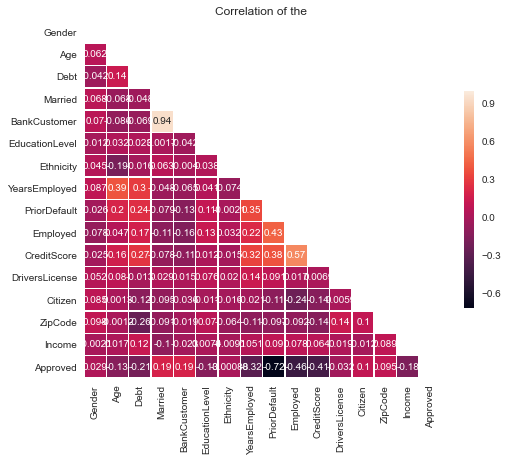

In [12]:
import pandas as pd
import yellowbrick #Yellowbrick is the visualization library built from scikit-learn and matplotlib
import matplotlib.pyplot as plt # for plots
import seaborn as sns
import numpy as np
%matplotlib inline

# calculate correlation matrix
corr = cc_data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# plot correlation matrix
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corr, mask=mask, square=True, linewidths=.5, annot=True, 
            cbar_kws={"shrink": .5})
ax.set_title('Correlation of the ')

### Feature selection

Machine learning models perform well with less number of features. So, we should select the most relevant features for the model.  
From the correlation matrix above, we can see that features like Driver License, Zip code and Ethinicity are not as important as other features. So, I would be dropping them from the dataset. 
Usually, you can do the correlation/covariance checks for all the features against the target feature but here I'm taking a shortcut.

In [13]:
cc_data = cc_data.drop(['DriversLicense', 'ZipCode', 'Ethnicity'], axis=1)
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 13 columns):
Gender            690 non-null int32
Age               690 non-null int32
Debt              690 non-null float64
Married           690 non-null int32
BankCustomer      690 non-null int32
EducationLevel    690 non-null int32
YearsEmployed     690 non-null float64
PriorDefault      690 non-null int32
Employed          690 non-null int32
CreditScore       690 non-null int64
Citizen           690 non-null int32
Income            690 non-null int64
Approved          690 non-null int32
dtypes: float64(2), int32(9), int64(2)
memory usage: 45.9 KB


### Splitting the dataset into Train and Test datasets

In [14]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Segregate features and labels into separate variables
X,y = cc_data.iloc[:,0:12] , cc_data.iloc[:,12]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                y,
                                test_size=0.30,
                                random_state=42)

In [15]:
X.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,Income
0,1,156,0.000,2,1,13,1.25,1,1,1,0,0
1,0,328,4.460,2,1,11,3.04,1,1,6,0,560
2,0,89,0.500,2,1,11,1.50,1,0,0,0,824
3,1,125,1.540,2,1,13,3.75,1,1,5,0,3
4,1,43,5.625,2,1,13,1.71,1,0,0,2,0


In [16]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Approved, dtype: int32

### Feature Scaling

Lets scale the features to a standard scaler so that machine learning models would learn from the data effectively.


In [17]:
# SKLearn's MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

### Modeling

#### Logistic Regression

Since we are dealing with a binary classification problem (Credit card is approved or not) and we also know that the features are correlated,  I will try logistic regression model and measure its accuracy.

In [18]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Logisticregression with default parameters
logreg = LogisticRegression()

# Fitting logreg to the train set
logreg.fit(rescaledX_train, y_train)

C:\Users\siris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Accuracy of the model

We created the model, so lets test the model logistic regression model with Test dataset

In [19]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledX_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", logreg.score(rescaledX_test, y_test))

# Print the confusion matrix of the logreg model
print(confusion_matrix(y_test, y_pred))

Accuracy of logistic regression classifier:  0.8405797101449275
[[86 11]
 [22 88]]


I achieved accuracy of 84% with default parameters. So, I would tune the parameters using Grid Search to see if the model can be improved.


In [20]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the grid of values for tol and max_iter
tol = [0.01, 0.001, 0.0001]
max_iter = [100, 150, 200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = dict(tol=tol, max_iter=max_iter)

In [21]:
# Create instance of GridSearchCV with the parameters
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Use scaler to rescale X and assign it to rescaledX
rescaledX = scaler.fit_transform(X)

# Fit data to grid model
grid_model_result = grid_model.fit(rescaledX, y)

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_

C:\Users\siris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\siris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\siris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\siris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\siris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Best score: 0.852174 using parameters {'max_iter': 100, 'tol': 0.01}


C:\Users\siris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\siris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\siris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\siris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\siris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [22]:
print("Best score: %f using parameters %s" % (best_score, best_params))

Best score: 0.852174 using parameters {'max_iter': 100, 'tol': 0.01}


The accuracy of the model has increased to 85% after tuning the parameters.